
# Chronic Kidney Disease :
---

- **To build a Machine Learning model to accurately predict whether or not the patients in the dataset have chronic disease or not**

- Dataset Source : [🔗kaggle.com](https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease)

- Here, I have used Random Forest Classifier and achieved >98% of accuracy.

In [1]:
import numpy as np
import pandas as pd

import os 
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
db = pd.read_csv('./dataset/new_model.csv')
db.head(5)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [4]:
print(db.info(), '\nShape:', db.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB
None 
Shape: (400, 14)


In [5]:
db.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


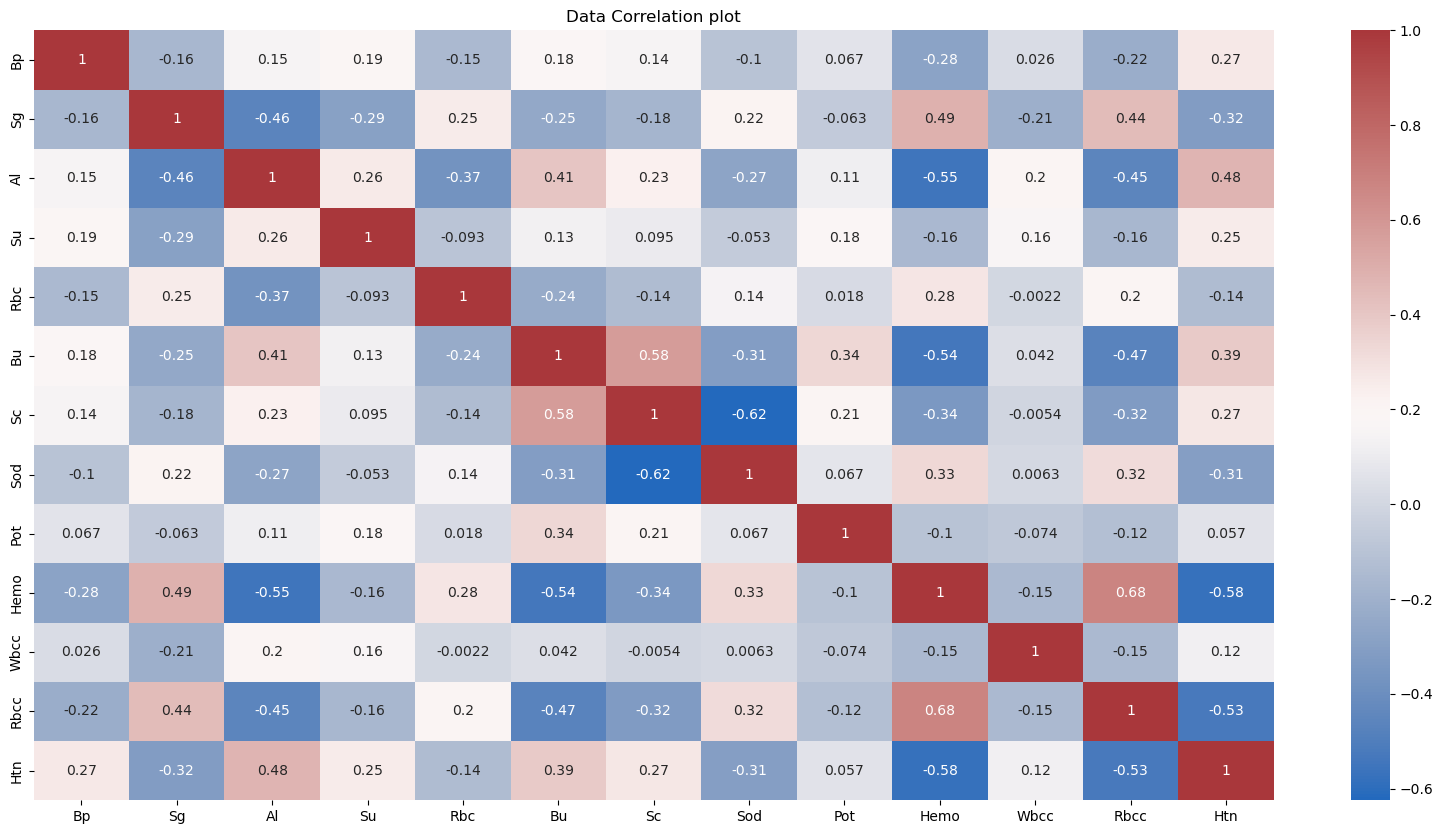

In [6]:
# Removing final class and keep rest features together

include_features = db.drop(db.columns[-1], axis=1)
# include_features

fig = plt.figure(figsize=(20,10))
sns.heatmap(include_features.corr(), annot = True, cmap='vlag')
plt.title("Data Correlation plot")
plt.show()

In [7]:
# Class value counts

db['Class'].value_counts()

1    250
0    150
Name: Class, dtype: int64

## Splitting into Test and Train

In [8]:
from sklearn.model_selection import train_test_split

X = db.drop(['Class'], axis=1)
# X
Y = db['Class']
# Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=3)

print(X_train.shape, X_test.shape)

(240, 13) (160, 13)


---
## Random Forest Classification:

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [10]:
model.score(X_test, Y_test)*100

98.125

In [11]:
#Predictions

y_predictions = model.predict(X_test)
y_predictions

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1], dtype=int64)

In [12]:
model.score(X_test, Y_test)*100


98.125

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, y_predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        49
           1       0.97      1.00      0.99       111

    accuracy                           0.98       160
   macro avg       0.99      0.97      0.98       160
weighted avg       0.98      0.98      0.98       160



In [14]:
print(confusion_matrix(Y_test, y_predictions))

[[ 46   3]
 [  0 111]]


---